# NYC Property Sales 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Newton\Desktop\DATA\nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Cleaning the data

### Droping rows of Nan

In [3]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


###### Dose not have any NaN values in the dataframe.

In [4]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

###### Dropping data not needed for analysis.

In [5]:
df.drop(columns=['Unnamed: 0','EASE-MENT','APARTMENT NUMBER','LAND SQUARE FEET','GROSS SQUARE FEET','BLOCK','LOT','ZIP CODE'], inplace=True)

###### Dropping duplicate values

In [6]:
sum(df.duplicated(df.columns))

2242

In [7]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

## Augementing data with proper values

#### Boroughs

In [8]:
df['BOROUGH'] = df['BOROUGH'].apply(str)

In [9]:
df['BOROUGH'] = df['BOROUGH'].replace(['1','2','3','4','5'],['Manhattan','Bronx','Brooklyn','Queens', 'Staten Island'])

#### Sales Price

In [10]:
df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 82306, dtype: object

In [11]:
df['SALE PRICE'] = df['SALE PRICE'].str.lstrip()
df['SALE PRICE'] = df['SALE PRICE'].str.rstrip()
df= df[df['SALE PRICE'] != '-']
df['SALE PRICE']

0         6625000
3         3936272
4         8000000
6         3192840
9        16232000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 69216, dtype: object

In [12]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '46 CONDO STORE BUILDINGS                   ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWELLINGS                  ',
       '04 TAX CLASS 1 CONDOS                      ',
       '21 OFFICE BUILDINGS                        ',
       '23 LOFT BUILDINGS  

Getting rid of numeric values infront of the class categories

In [13]:
df['BUILDING CLASS'] = df['BUILDING CLASS CATEGORY'].str[3:]
del df['BUILDING CLASS CATEGORY']
df['BUILDING CLASS']

0        RENTALS - WALKUP APARTMENTS             
3        RENTALS - WALKUP APARTMENTS             
4        RENTALS - WALKUP APARTMENTS             
6        RENTALS - WALKUP APARTMENTS             
9        RENTALS - ELEVATOR APARTMENTS           
                           ...                   
84543    TWO FAMILY DWELLINGS                    
84544    TWO FAMILY DWELLINGS                    
84545    TWO FAMILY DWELLINGS                    
84546    STORE BUILDINGS                         
84547    INDOOR PUBLIC AND CULTURAL FACILITIES   
Name: BUILDING CLASS, Length: 69216, dtype: object

In [14]:
df['BUILDING CLASS'] = df['BUILDING CLASS'].str.lstrip()
df['BUILDING CLASS'].head()

0    RENTALS - WALKUP APARTMENTS             
3    RENTALS - WALKUP APARTMENTS             
4    RENTALS - WALKUP APARTMENTS             
6    RENTALS - WALKUP APARTMENTS             
9    RENTALS - ELEVATOR APARTMENTS           
Name: BUILDING CLASS, dtype: object

## Data Exploration

## Which Borough had the most units sold?

In [15]:
Borough = df.groupby('BOROUGH').sum()
totalu = Borough['TOTAL UNITS'].astype(int)
totalu

BOROUGH
Bronx            24513
Brooklyn         52070
Manhattan        27833
Queens           30556
Staten Island     8042
Name: TOTAL UNITS, dtype: int32

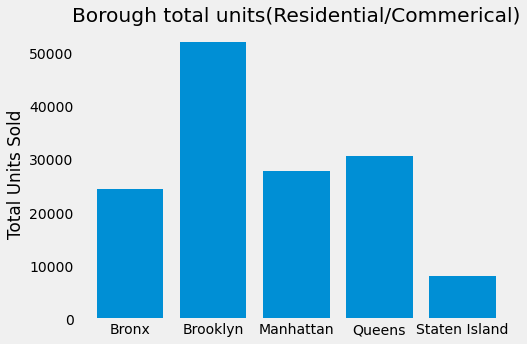

In [16]:
Borough = Borough = [BOROUGH for BOROUGH, df in df.groupby('BOROUGH')]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
plt.bar(Borough,totalu)
plt.grid(False)

plt.title('Borough total units(Residential/Commerical)')
plt.ylabel('Total Units Sold')
plt.show()

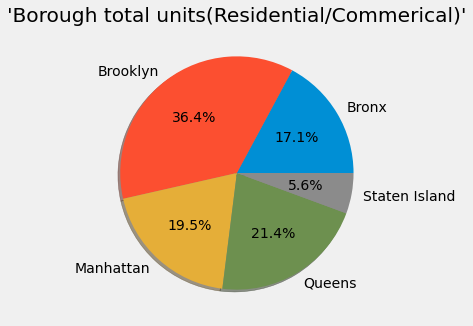

In [17]:
Borough = Borough = [BOROUGH for BOROUGH, df in df.groupby('BOROUGH')]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
plt.title("'Borough total units(Residential/Commerical)'")
plt.pie(totalu, labels=Borough, autopct='%1.1f%%', shadow=True)
plt.show()

## Which neighborhoods had the most units sold in each Borough?

In [18]:
def borough(x):
  return df.groupby('BOROUGH').get_group(x).groupby('NEIGHBORHOOD').sum()['TOTAL UNITS'].sort_values(ascending=False).head(1)

In [19]:
nyc = ['Manhattan','Bronx','Brooklyn','Queens', 'Staten Island']

for x in nyc: 
  print(x),print(borough(x)),print('  ')

Manhattan
NEIGHBORHOOD
HARLEM-CENTRAL    6058
Name: TOTAL UNITS, dtype: int64
  
Bronx
NEIGHBORHOOD
BRONXDALE    2830
Name: TOTAL UNITS, dtype: int64
  
Brooklyn
NEIGHBORHOOD
BEDFORD STUYVESANT    3874
Name: TOTAL UNITS, dtype: int64
  
Queens
NEIGHBORHOOD
FLUSHING-NORTH    2835
Name: TOTAL UNITS, dtype: int64
  
Staten Island
NEIGHBORHOOD
NEW SPRINGVILLE    680
Name: TOTAL UNITS, dtype: int64
  


## What was the total sales during 12 months in the entire city?

Convert into numeric and then datetime to filter out the month

In [20]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

In [21]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['Month'] = df['SALE DATE'].dt.month

In [22]:
m = df.groupby(['Month'])
x = m['SALE PRICE'].sum()

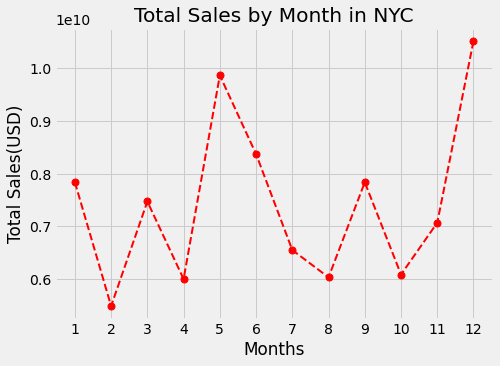

In [23]:
from matplotlib.pyplot import figure
plt.figure(figsize=(7, 5))

months = range(1,13)

plt.plot(months,x, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=7)
plt.xticks(months)
plt.grid(True)

plt.xlabel("Months")
plt.ylabel("Total Sales(USD)")
plt.title("Total Sales by Month in NYC")

plt.show()

## What are the top five building classes?

In [36]:
build_group = df.groupby('BUILDING CLASS').sum()
build_ordered = build_group['TOTAL UNITS'].sort_values(ascending=False).head(10)
build_ordered 

BUILDING CLASS
RENTALS - WALKUP APARTMENTS                 29532
TWO FAMILY DWELLINGS                        26701
RENTALS - ELEVATOR APARTMENTS               22844
ONE FAMILY DWELLINGS                        14735
THREE FAMILY DWELLINGS                      10899
CONDOS - ELEVATOR APARTMENTS                 8219
COOPS - ELEVATOR APARTMENTS                  6845
RENTALS - 4-10 UNIT                          2926
EDUCATIONAL FACILITIES                       2312
STORE BUILDINGS                              2205
Name: TOTAL UNITS, dtype: int64

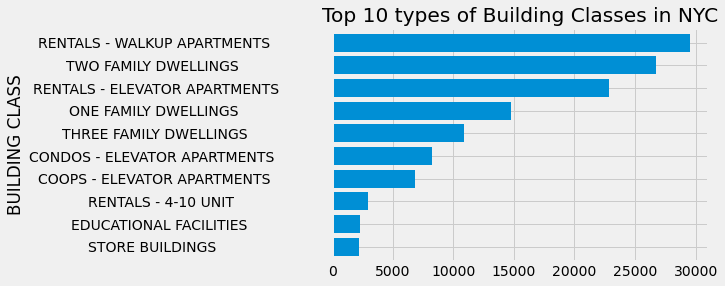

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))

build_ordered.sort_values(ascending=True).plot(kind = 'barh',width = 0.8)

plt.title('Top 10 types of Building Classes in NYC')
plt.show()

## What is the average age of the buildings?

In [26]:
df['YEAR BUILT'].value_counts()

0       5238
1920    4953
1930    4198
1925    3622
1910    3055
        ... 
1883       1
1829       1
1891       1
1855       1
1111       1
Name: YEAR BUILT, Length: 155, dtype: int64

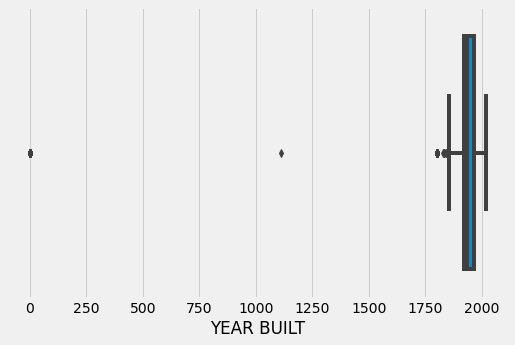

In [27]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.boxplot(x = 'YEAR BUILT', data=df, ax=ax)
plt.show()

###### Need to get rid of outliers!

In [39]:
df = df[df['YEAR BUILT'] >= 1900]

In [40]:
df['YEAR BUILT'].describe()

count    62054.000000
mean      1950.978019
std         33.456429
min       1900.000000
25%       1925.000000
50%       1945.000000
75%       1970.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

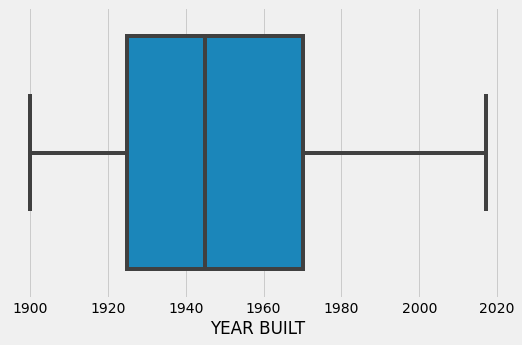

In [41]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.boxplot(x = 'YEAR BUILT', data=df, ax=ax)
plt.show()

##### Better!!!

In [42]:
df['Building Age'] = 2020 - df['YEAR BUILT']

In [43]:
df['Building Age'].mean()

69.02198085538402

### The average age of the buildings is 69 years old.